In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tr =pd.read_excel("Data_Train.xlsx")

In [3]:
tr.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
tr.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
tr["Date"]=pd.to_datetime(tr["Date_of_Journey"] ,dayfirst=True) #day first so it can read correct

In [7]:
tr.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019-06-09
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019-05-12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019-03-01


In [8]:
tr["Day"]=tr["Date"].dt.day
tr["Month"]=tr["Date"].dt.month
tr["Year"]=tr["Date"].dt.year

In [9]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  object        
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Date             10683 non-null  datetime64[ns]
 12  Day              10683 non-null  int64         
 13  Month            10683 non-null  int64         
 14  Year             10683 non-null  int64

In [10]:
tr.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019-06-09,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019-05-12,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019-03-01,1,3,2019


In [11]:
tr["Dep_Hour"]=tr["Dep_Time"].str.split(":" ,expand=True)[0]
tr["Dep_Time"]=tr["Dep_Time"].str.split(":").str[1]

In [12]:
tr.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Day,Month,Year,Dep_Hour
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24,24,3,2019,22
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,50,13:15,7h 25m,2 stops,No info,7662,2019-05-01,1,5,2019,05
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,25,04:25 10 Jun,19h,2 stops,No info,13882,2019-06-09,9,6,2019,09
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,05,23:30,5h 25m,1 stop,No info,6218,2019-05-12,12,5,2019,18
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,50,21:35,4h 45m,1 stop,No info,13302,2019-03-01,1,3,2019,16


In [13]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  object        
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Date             10683 non-null  datetime64[ns]
 12  Day              10683 non-null  int64         
 13  Month            10683 non-null  int64         
 14  Year             10683 non-null  int64

In [14]:
tr["Dep_Hour"]=tr["Dep_Hour"].astype(int)
tr["Dep_Time"]=tr["Dep_Time"].astype(int)

In [15]:
tr["Arrival_Time"].str.split(" " ,1,expand=True)[0]

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: 0, Length: 10683, dtype: object

In [16]:
tr["Arrival_Hour"]=tr["Arrival_Time"].str.split(" " ,1,expand=True)[0].str.split(":").str[0]
tr["Arrival_Minute"]=tr["Arrival_Time"].str.split(" " ,1,expand=True)[0].str.split(":").str[1]
tr["Arrival_Hour"]=tr["Arrival_Hour"].astype(int)
tr["Arrival_Hour"]=tr["Arrival_Hour"].astype(int)

In [17]:
tr.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Day,Month,Year,Dep_Hour,Arrival_Hour,Arrival_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24,24,3,2019,22,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,50,13:15,7h 25m,2 stops,No info,7662,2019-05-01,1,5,2019,5,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,25,04:25 10 Jun,19h,2 stops,No info,13882,2019-06-09,9,6,2019,9,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,5,23:30,5h 25m,1 stop,No info,6218,2019-05-12,12,5,2019,18,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,50,21:35,4h 45m,1 stop,No info,13302,2019-03-01,1,3,2019,16,21,35


In [18]:
tr.drop(columns=['Date_of_Journey',  'Route','Arrival_Time'] ,inplace=True)
tr.rename(columns= {"Dep_Time" :"Dep_Minute" } ,inplace=True)

In [19]:
tr["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [20]:
dw= { "non-stop" :0 ,
     "2 stops" :2 ,
     "1 stop" :1 ,
     "3 stops" :3 ,
     "4 stops" :4 ,
}
tr["Total_Stop"]=tr["Total_Stops"].map(dw)

In [21]:
tr.drop(columns="Total_Stops" ,inplace=True)

In [22]:
tr.head()

,Airline,Source,Destination,Dep_Minute,Duration,Additional_Info,Price,Date,Day,Month,Year,Dep_Hour,Arrival_Hour,Arrival_Minute,Total_Stop
0,IndiGo,Banglore,New Delhi,20,2h 50m,No info,3897,2019-03-24,24,3,2019,22,1,10,0.0
1,Air India,Kolkata,Banglore,50,7h 25m,No info,7662,2019-05-01,1,5,2019,5,13,15,2.0
2,Jet Airways,Delhi,Cochin,25,19h,No info,13882,2019-06-09,9,6,2019,9,4,25,2.0
3,IndiGo,Kolkata,Banglore,5,5h 25m,No info,6218,2019-05-12,12,5,2019,18,23,30,1.0
4,IndiGo,Banglore,New Delhi,50,4h 45m,No info,13302,2019-03-01,1,3,2019,16,21,35,1.0


In [24]:
tr.isnull().mean()

Airline            0.000000
Source             0.000000
Destination        0.000000
Dep_Minute         0.000000
Duration           0.000000
Additional_Info    0.000000
Price              0.000000
Date               0.000000
Day                0.000000
Month              0.000000
Year               0.000000
Dep_Hour           0.000000
Arrival_Hour       0.000000
Arrival_Minute     0.000000
Total_Stop         0.000094
dtype: float64

In [25]:
tr[tr["Total_Stop"].isnull()==True]

,Airline,Source,Destination,Dep_Minute,Duration,Additional_Info,Price,Date,Day,Month,Year,Dep_Hour,Arrival_Hour,Arrival_Minute,Total_Stop
9039,Air India,Delhi,Cochin,45,23h 40m,No info,7480,2019-05-06,6,5,2019,9,9,25,NaN


In [26]:
tr["Total_Stop"].mode()#it isa series

0    1.0
dtype: float64

In [27]:
tr[tr["Total_Stop"].isnull()==True].fillna(tr["Total_Stop"].mode()[0])

,Airline,Source,Destination,Dep_Minute,Duration,Additional_Info,Price,Date,Day,Month,Year,Dep_Hour,Arrival_Hour,Arrival_Minute,Total_Stop
9039,Air India,Delhi,Cochin,45,23h 40m,No info,7480,2019-05-06,6,5,2019,9,9,25,1.0


In [28]:
tr["Duration"].apply(lambda x : x.split(" ")[0].split("h")[0])

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10683, dtype: object

In [29]:
tr["Duration"].apply(lambda x : x.split(" ")[len( x.split(" "))].split("m")[0])

IndexError: list index out of range

In [30]:
tr["Dr_HM"]=tr["Duration"].apply(lambda x : x.split(" ")[0].split("h")[0])
tr

,Airline,Source,Destination,Dep_Minute,Duration,Additional_Info,Price,Date,Day,Month,Year,Dep_Hour,Arrival_Hour,Arrival_Minute,Total_Stop,Dr_HM
0,IndiGo,Banglore,New Delhi,20,2h 50m,No info,3897,2019-03-24,24,3,2019,22,1,10,0.0,2
1,Air India,Kolkata,Banglore,50,7h 25m,No info,7662,2019-05-01,1,5,2019,5,13,15,2.0,7
2,Jet Airways,Delhi,Cochin,25,19h,No info,13882,2019-06-09,9,6,2019,9,4,25,2.0,19
3,IndiGo,Kolkata,Banglore,5,5h 25m,No info,6218,2019-05-12,12,5,2019,18,23,30,1.0,5
4,IndiGo,Banglore,New Delhi,50,4h 45m,No info,13302,2019-03-01,1,3,2019,16,21,35,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,55,2h 30m,No info,4107,2019-04-09,9,4,2019,19,22,25,0.0,2
10679,Air India,Kolkata,Banglore,45,2h 35m,No info,4145,2019-04-27,27,4,2019,20,23,20,0.0,2
10680,Jet Airways,Banglore,Delhi,20,3h,No info,7229,2019-04-27,27,4,2019,8,11,20,0.0,3
10681,Vistara,Banglore,New Delhi,30,2h 40m,No info,12648,2019-03-01,1,3,2019,11,14,10,0.0,2


In [31]:
tr["Dr_Minute"]=tr["Duration"].apply(lambda x : x.split(" ")[-1].split("m")[0])
tr

,Airline,Source,Destination,Dep_Minute,Duration,Additional_Info,Price,Date,Day,Month,Year,Dep_Hour,Arrival_Hour,Arrival_Minute,Total_Stop,Dr_HM,Dr_Minute
0,IndiGo,Banglore,New Delhi,20,2h 50m,No info,3897,2019-03-24,24,3,2019,22,1,10,0.0,2,50
1,Air India,Kolkata,Banglore,50,7h 25m,No info,7662,2019-05-01,1,5,2019,5,13,15,2.0,7,25
2,Jet Airways,Delhi,Cochin,25,19h,No info,13882,2019-06-09,9,6,2019,9,4,25,2.0,19,19h
3,IndiGo,Kolkata,Banglore,5,5h 25m,No info,6218,2019-05-12,12,5,2019,18,23,30,1.0,5,25
4,IndiGo,Banglore,New Delhi,50,4h 45m,No info,13302,2019-03-01,1,3,2019,16,21,35,1.0,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,55,2h 30m,No info,4107,2019-04-09,9,4,2019,19,22,25,0.0,2,30
10679,Air India,Kolkata,Banglore,45,2h 35m,No info,4145,2019-04-27,27,4,2019,20,23,20,0.0,2,35
10680,Jet Airways,Banglore,Delhi,20,3h,No info,7229,2019-04-27,27,4,2019,8,11,20,0.0,3,3h
10681,Vistara,Banglore,New Delhi,30,2h 40m,No info,12648,2019-03-01,1,3,2019,11,14,10,0.0,2,40


In [32]:
for i in range(0,10682):
    if "h" in tr["Dr_Minute"][i]:
        tr["Dr_Minute"][i]="0"

C:\Users\Honasa\AppData\Local\Temp/ipykernel_20556/488642370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr["Dr_Minute"][i]="0"


In [33]:
tr

,Airline,Source,Destination,Dep_Minute,Duration,Additional_Info,Price,Date,Day,Month,Year,Dep_Hour,Arrival_Hour,Arrival_Minute,Total_Stop,Dr_HM,Dr_Minute
0,IndiGo,Banglore,New Delhi,20,2h 50m,No info,3897,2019-03-24,24,3,2019,22,1,10,0.0,2,50
1,Air India,Kolkata,Banglore,50,7h 25m,No info,7662,2019-05-01,1,5,2019,5,13,15,2.0,7,25
2,Jet Airways,Delhi,Cochin,25,19h,No info,13882,2019-06-09,9,6,2019,9,4,25,2.0,19,0
3,IndiGo,Kolkata,Banglore,5,5h 25m,No info,6218,2019-05-12,12,5,2019,18,23,30,1.0,5,25
4,IndiGo,Banglore,New Delhi,50,4h 45m,No info,13302,2019-03-01,1,3,2019,16,21,35,1.0,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,55,2h 30m,No info,4107,2019-04-09,9,4,2019,19,22,25,0.0,2,30
10679,Air India,Kolkata,Banglore,45,2h 35m,No info,4145,2019-04-27,27,4,2019,20,23,20,0.0,2,35
10680,Jet Airways,Banglore,Delhi,20,3h,No info,7229,2019-04-27,27,4,2019,8,11,20,0.0,3,0
10681,Vistara,Banglore,New Delhi,30,2h 40m,No info,12648,2019-03-01,1,3,2019,11,14,10,0.0,2,40


In [34]:
if "h" in tr["Dr_Minute"][2]:
    print(tr["Dr_Minute"][2])

In [35]:
tr

,Airline,Source,Destination,Dep_Minute,Duration,Additional_Info,Price,Date,Day,Month,Year,Dep_Hour,Arrival_Hour,Arrival_Minute,Total_Stop,Dr_HM,Dr_Minute
0,IndiGo,Banglore,New Delhi,20,2h 50m,No info,3897,2019-03-24,24,3,2019,22,1,10,0.0,2,50
1,Air India,Kolkata,Banglore,50,7h 25m,No info,7662,2019-05-01,1,5,2019,5,13,15,2.0,7,25
2,Jet Airways,Delhi,Cochin,25,19h,No info,13882,2019-06-09,9,6,2019,9,4,25,2.0,19,0
3,IndiGo,Kolkata,Banglore,5,5h 25m,No info,6218,2019-05-12,12,5,2019,18,23,30,1.0,5,25
4,IndiGo,Banglore,New Delhi,50,4h 45m,No info,13302,2019-03-01,1,3,2019,16,21,35,1.0,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,55,2h 30m,No info,4107,2019-04-09,9,4,2019,19,22,25,0.0,2,30
10679,Air India,Kolkata,Banglore,45,2h 35m,No info,4145,2019-04-27,27,4,2019,20,23,20,0.0,2,35
10680,Jet Airways,Banglore,Delhi,20,3h,No info,7229,2019-04-27,27,4,2019,8,11,20,0.0,3,0
10681,Vistara,Banglore,New Delhi,30,2h 40m,No info,12648,2019-03-01,1,3,2019,11,14,10,0.0,2,40


In [37]:
for i in range(0,10682):
    if "m" in tr["Dr_HM"][i]:
        tr["Dr_HM"][i]="0"

C:\Users\Honasa\AppData\Local\Temp/ipykernel_20556/280447620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr["Dr_HM"][i]="0"


In [38]:
tr["Dr_HM"]=tr["Dr_HM"].astype(int)
tr["Dr_Minute"]=tr["Dr_Minute"].astype(int)

In [39]:
tr["Duration in MM"]=tr["Dr_HM"]*60+tr["Dr_Minute"]

In [40]:
tr

,Airline,Source,Destination,Dep_Minute,Duration,Additional_Info,Price,Date,Day,Month,Year,Dep_Hour,Arrival_Hour,Arrival_Minute,Total_Stop,Dr_HM,Dr_Minute,Duration in MM
0,IndiGo,Banglore,New Delhi,20,2h 50m,No info,3897,2019-03-24,24,3,2019,22,1,10,0.0,2,50,170
1,Air India,Kolkata,Banglore,50,7h 25m,No info,7662,2019-05-01,1,5,2019,5,13,15,2.0,7,25,445
2,Jet Airways,Delhi,Cochin,25,19h,No info,13882,2019-06-09,9,6,2019,9,4,25,2.0,19,0,1140
3,IndiGo,Kolkata,Banglore,5,5h 25m,No info,6218,2019-05-12,12,5,2019,18,23,30,1.0,5,25,325
4,IndiGo,Banglore,New Delhi,50,4h 45m,No info,13302,2019-03-01,1,3,2019,16,21,35,1.0,4,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,55,2h 30m,No info,4107,2019-04-09,9,4,2019,19,22,25,0.0,2,30,150
10679,Air India,Kolkata,Banglore,45,2h 35m,No info,4145,2019-04-27,27,4,2019,20,23,20,0.0,2,35,155
10680,Jet Airways,Banglore,Delhi,20,3h,No info,7229,2019-04-27,27,4,2019,8,11,20,0.0,3,0,180
10681,Vistara,Banglore,New Delhi,30,2h 40m,No info,12648,2019-03-01,1,3,2019,11,14,10,0.0,2,40,160


In [41]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Source           10683 non-null  object        
 2   Destination      10683 non-null  object        
 3   Dep_Minute       10683 non-null  int32         
 4   Duration         10683 non-null  object        
 5   Additional_Info  10683 non-null  object        
 6   Price            10683 non-null  int64         
 7   Date             10683 non-null  datetime64[ns]
 8   Day              10683 non-null  int64         
 9   Month            10683 non-null  int64         
 10  Year             10683 non-null  int64         
 11  Dep_Hour         10683 non-null  int32         
 12  Arrival_Hour     10683 non-null  int32         
 13  Arrival_Minute   10683 non-null  object        
 14  Total_Stop       10682 non-null  float

In [42]:
tr["Time_of_Day"]=np.arange(0,10683)

In [208]:
# we have to intilatize the column before hand if use if else,or we should ise map function below here

In [43]:
for i in range(0,10683):
    if tr["Dep_Hour"][i]>3 and tr["Dep_Hour"][i] <8:
        tr["Time_of_Day"][i]="Early Morning"
    elif tr["Dep_Hour"][i]>7 and tr["Dep_Hour"][i] <12:
        tr["Time_of_Day"][i]="Morning"
    elif tr["Dep_Hour"][i]>11 and tr["Dep_Hour"][i] <16:
        tr["Time_of_Day"][i]="Afternoon"
    elif tr["Dep_Hour"][i]>15 and tr["Dep_Hour"][i] <19:
        tr["Time_of_Day"][i]="Evening"
    elif tr["Dep_Hour"][i]>20 and tr["Dep_Hour"][i] <23:
        tr["Time_of_Day"][i]="Night"
    else:
        tr["Time_of_Day"][i]="Late Night"

C:\Users\Honasa\AppData\Local\Temp/ipykernel_20556/2609883427.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr["Time_of_Day"][i]="Night"
C:\Users\Honasa\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [44]:
tr

,Airline,Source,Destination,Dep_Minute,Duration,Additional_Info,Price,Date,Day,Month,Year,Dep_Hour,Arrival_Hour,Arrival_Minute,Total_Stop,Dr_HM,Dr_Minute,Duration in MM,Time_of_Day
0,IndiGo,Banglore,New Delhi,20,2h 50m,No info,3897,2019-03-24,24,3,2019,22,1,10,0.0,2,50,170,Night
1,Air India,Kolkata,Banglore,50,7h 25m,No info,7662,2019-05-01,1,5,2019,5,13,15,2.0,7,25,445,Early Morning
2,Jet Airways,Delhi,Cochin,25,19h,No info,13882,2019-06-09,9,6,2019,9,4,25,2.0,19,0,1140,Morning
3,IndiGo,Kolkata,Banglore,5,5h 25m,No info,6218,2019-05-12,12,5,2019,18,23,30,1.0,5,25,325,Evening
4,IndiGo,Banglore,New Delhi,50,4h 45m,No info,13302,2019-03-01,1,3,2019,16,21,35,1.0,4,45,285,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,55,2h 30m,No info,4107,2019-04-09,9,4,2019,19,22,25,0.0,2,30,150,Late Night
10679,Air India,Kolkata,Banglore,45,2h 35m,No info,4145,2019-04-27,27,4,2019,20,23,20,0.0,2,35,155,Late Night
10680,Jet Airways,Banglore,Delhi,20,3h,No info,7229,2019-04-27,27,4,2019,8,11,20,0.0,3,0,180,Morning
10681,Vistara,Banglore,New Delhi,30,2h 40m,No info,12648,2019-03-01,1,3,2019,11,14,10,0.0,2,40,160,Morning


In [210]:
tr.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Minute', 'Duration',
       'Additional_Info', 'Price', 'Date', 'Day', 'Month', 'Year', 'Dep_Hour',
       'Arrival_Hour', 'Arrival_Minute', 'Total_Stop', 'Dr_HM', 'Dr_Minute',
       'Duration in MM', 'Time_of_Day'],
      dtype='object')

In [45]:
airline=tr.groupby("Airline").size().reset_index().sort_values(by=0 ,ascending=False)

<AxesSubplot:xlabel='Airline', ylabel='0'>

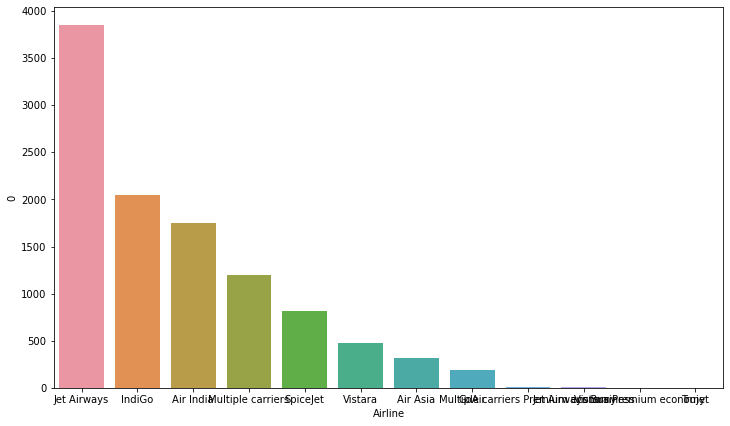

In [47]:
plt.figure(figsize=(12,7))
sns.barplot(x="Airline" ,y=0,data=airline)

In [48]:
source=tr.groupby("Source").size().reset_index().sort_values(by=0 ,ascending=False)

<AxesSubplot:xlabel='Source', ylabel='0'>

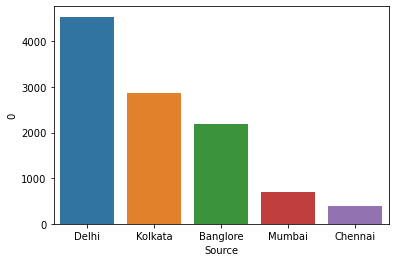

In [49]:
sns.barplot(x="Source" ,y=0,data=source)

In [50]:
destination=tr.groupby("Destination").size().reset_index().sort_values(by=0 ,ascending=False)

<AxesSubplot:xlabel='Destination', ylabel='0'>

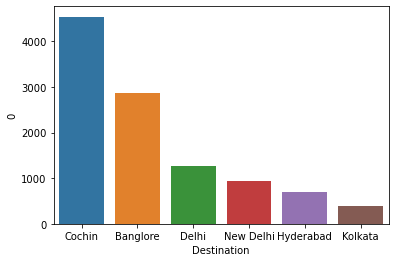

In [51]:
sns.barplot(x="Destination" ,y=0,data=destination)

In [55]:
td=tr.groupby(["Airline","Source","Time_of_Day"]).size().reset_index()

In [57]:
td.rename(columns={0:"No_0f_flights"},inplace=True)

In [58]:
td

,Airline,Source,Time_of_Day,No_0f_flights
0,Air Asia,Banglore,Early Morning,32
1,Air Asia,Banglore,Late Night,33
2,Air Asia,Banglore,Morning,24
3,Air Asia,Delhi,Early Morning,30
4,Air Asia,Delhi,Evening,33
...,...,...,...,...
149,Vistara,Mumbai,Morning,9
150,Vistara,Mumbai,Night,3
151,Vistara Premium economy,Banglore,Evening,1
152,Vistara Premium economy,Banglore,Morning,1


In [79]:
order_td=["Early Morning","Morning","Afternoon","Evening","Night","Late Night"]

<AxesSubplot:xlabel='Time_of_Day', ylabel='count'>

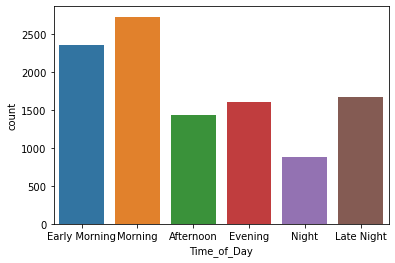

In [80]:
sns.countplot(x=tr["Time_of_Day"] ,order=order_td)

In [59]:
tp=tr.groupby(["Airline","Source","Destination"])["Price"].min().reset_index().sort_values(by=["Airline","Source","Destination"])
tp

,Airline,Source,Destination,Price
0,Air Asia,Banglore,Delhi,3383
1,Air Asia,Banglore,New Delhi,3383
2,Air Asia,Delhi,Cochin,6151
3,Air Asia,Kolkata,Banglore,3782
4,Air India,Banglore,Delhi,4441
5,Air India,Banglore,New Delhi,3758
6,Air India,Chennai,Kolkata,3145
7,Air India,Delhi,Cochin,4487
8,Air India,Kolkata,Banglore,4145
9,Air India,Mumbai,Hyderabad,2050


In [81]:
sp=tr.pivot_table(values="Price",index="Airline",columns="Time_of_Day",aggfunc="mean",fill_value=0)
sp

Time_of_Day,Afternoon,Early Morning,Evening,Late Night,Morning,Night
Airline,,,,,,
Air Asia,6341.888889,5881.783505,8381.787879,5385.620690,4185.648148,4731.025641
Air India,8571.959375,10086.816273,10119.532567,8341.461538,10683.258278,8038.751938
GoAir,9454.947368,5333.262500,8382.636364,5276.307692,5060.545455,10091.000000
IndiGo,5344.392617,6020.636187,6178.388514,4951.077135,6230.674863,4881.314815
Jet Airways,11909.892241,11463.181818,11528.991176,11261.446626,11566.384043,13045.393189
Jet Airways Business,0.000000,64722.666667,0.000000,49387.500000,57209.000000,0.000000
Multiple carriers,11344.364078,10074.052288,12366.171717,11454.677419,10871.057361,0.000000
Multiple carriers Premium economy,0.000000,11809.444444,0.000000,10885.000000,10425.000000,0.000000
SpiceJet,4544.521739,3939.361582,4387.756098,5128.727273,4893.354015,3521.028369


<AxesSubplot:xlabel='Time_of_Day', ylabel='Airline'>

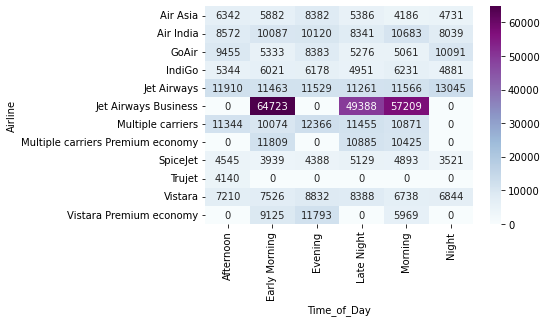

In [83]:
sns.heatmap(sp ,annot=True,cmap='BuPu',fmt='.0f')

In [68]:
mp=tr.pivot_table(values="Dr_HM",index="Source",columns="Destination",aggfunc="count",fill_value=0)
mp

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1265,0,0,932
Chennai,0,0,0,0,381,0
Delhi,0,4537,0,0,0,0
Kolkata,2871,0,0,0,0,0
Mumbai,0,0,0,697,0,0


In [60]:
from matplotlib.colors import LinearSegmentedColormap

<AxesSubplot:xlabel='Destination', ylabel='Source'>

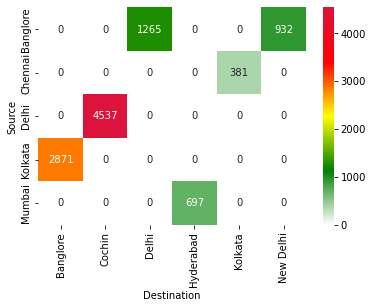

In [63]:
sns.heatmap(mp ,annot=True,cmap= LinearSegmentedColormap.from_list('RedGreen', ['white','green','yellow','red','crimson', ]),fmt='.0f')

In [64]:
st=tr.pivot_table(values="Dr_HM",index="Airline",columns="Total_Stop",aggfunc="count",fill_value=0)

<AxesSubplot:xlabel='Total_Stop', ylabel='Airline'>

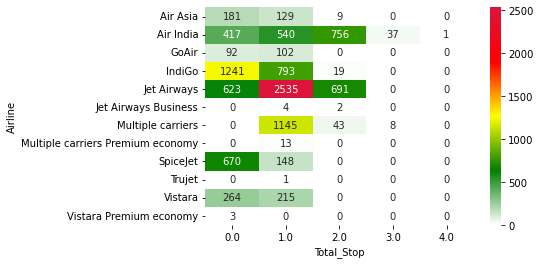

In [65]:
sns.heatmap(st,annot=True,cmap= LinearSegmentedColormap.from_list('RedGreen', ['white','green','yellow','red','crimson', ]),fmt='.0f')

In [89]:
tn=tr.pivot_table(values="Dr_HM",index="Airline",columns="Day",aggfunc="count",fill_value=0)
tn

Day,1,3,6,9,12,15,18,21,24,27
Airline,,,,,,,,,,
Air Asia,28,27,32,41,29,33,28,31,37,33
Air India,197,141,224,234,169,167,134,178,166,142
GoAir,21,24,19,23,12,23,12,12,28,20
IndiGo,184,235,204,253,152,218,159,206,204,238
Jet Airways,430,193,517,544,424,285,320,405,376,355
Jet Airways Business,4,1,1,0,0,0,0,0,0,0
Multiple carriers,75,121,144,160,65,132,63,138,73,225
Multiple carriers Premium economy,0,0,0,0,0,0,0,13,0,0
SpiceJet,76,77,79,90,54,87,79,89,100,87


<AxesSubplot:xlabel='Day', ylabel='Airline'>

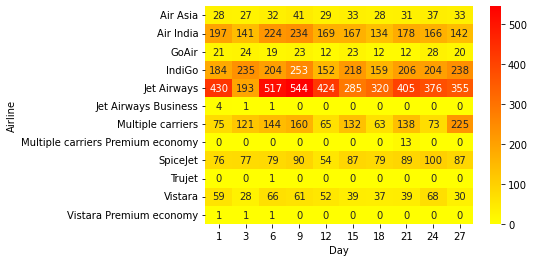

In [88]:
sns.heatmap(tn,annot=True,cmap='autumn_r' ,fmt='.0f')